In [5]:
# Higher ESG ratings are generally positively correlated with valuation and profitability while negatively correlated with volatility.
# natural language processing (NLP) techniques and graph analytics to extract key strategic ESG initiatives and learn companies’ relationships in a global market and their impact to market risk calculations.
# extract the key ESG initiatives as communicated in yearly PDF reports
# compare these with the actual media coverage from news analytics data.
# transform a word into its simpler grammatical form, such as past tenses transformed to present form or plural form converted to singular


In [6]:
# Extracting statements from ESG reports



Barclays	https://home.barclays/content/dam/home-barclays/documents/citizenship/ESG/Barclays-PLC-ESG-Report-2019.pdf

JP Morgan Chase	https://impact.jpmorganchase.com/content/dam/jpmc/jpmorgan-chase-and-co/documents/jpmc-cr-esg-report-2019.pdf

Morgan Stanley	https://www.morganstanley.com/pub/content/dam/msdotcom/sustainability/Morgan-Stanley_2019-Sustainability-Report_Final.pdf

Goldman Sachs	https://www.goldmansachs.com/what-we-do/sustainable-finance/documents/reports/2019-sustainability-report.pdf

In [7]:
# Retrieve news
import urllib.request
from datetime import datetime
 
master_url = 'http://data.gdeltproject.org/gdeltv2/masterfilelist.txt'
master_file = urllib.request.urlopen(master_url)
min_date = datetime.strptime("2021 11 3 9", '%Y %m %d %H')
max_date = datetime.strptime("2021 11 3 12", '%Y %m %d %H')
to_download = []
for line in master_file:
  decoded_line = line.decode("utf-8")
  if 'gkg.csv.zip' in decoded_line:
    a = decoded_line.split(' ')
    file_url = a[2].strip()
    file_dte = datetime_object = datetime.strptime(file_url.split('/')[-1].split('.')[0], '%Y%m%d%H%M%S')
    if (file_dte > min_date and file_dte <= max_date):
      to_download.append(file_url)
 
print("{} file(s) to download since {}".format(len(to_download), min_date))

12 file(s) to download since 2021-11-03 09:00:00


In [ ]:
from zipfile import ZipFile
import gzip
import io
import os
 
def download_content(url, save_path):
  with urllib.request.urlopen(url) as dl_file:
    input_zip = ZipFile(io.BytesIO(dl_file.read()), "r")
    name = input_zip.namelist()[0]
    with gzip.open(save_path, 'wb') as f:
      f.write(input_zip.read(name))
 
def download_to_dbfs(url):
  file_name = '{}.gz'.format(url.split('/')[-1][:-4])
  tmp_file = '{}/{}'.format("/content", file_name)
  download_content(url, tmp_file)
  # dbutils.fs.mv('file:{}'.format(tmp_file), 'dbfs:{}/{}'.format("/content", file_name))
    
n = len(to_download)
for i, url in enumerate(to_download):
  download_to_dbfs(url)
  print("{}/{} [{}]".format(i + 1, n, url))

1/12 [http://data.gdeltproject.org/gdeltv2/20211103091500.gkg.csv.zip]
2/12 [http://data.gdeltproject.org/gdeltv2/20211103093000.gkg.csv.zip]


In [1]:
import pandas as pd
# documentation available
# http://data.gdeltproject.org/documentation/GDELT-Global_Knowledge_Graph_Codebook-V2.1.pdf
header_list = ["GKGRECORDID", "V2.1DATE", "V2SOURCECOLLECTIONIDENTIFIER", "V2SOURCECOMMONNAME", "V2DOCUMENTIDENTIFIER",
           "V1COUNTS", "V2.1COUNTS", "V1THEMES", "V2ENHANCEDTHEMES", "V1LOCATIONS", "V2ENHANCEDLOCATIONS", "V1PERSONS", "V2ENHANCEDPERSONS",
           "V1ORGANIZATIONS", "V2ENHANCEDORGANIZATIONS", "V1.5TONE", "V2.1ENHANCEDDATES", "V2GCAM", "V2.1SHARINGIMAGE", "V2.1RELATEDIMAGES",
           "V2.1SOCIALIMAGEEMBEDS", "V2.1SOCIALVIDEOEMBEDS", "V2.1QUOTATIONS", "V2.1ALLNAMES", "V2.1AMOUNTS", "V2.1TRANSLATIONINFO", "V2EXTRASXML"]
        
data = pd.read_csv('/content/20211102001500.gkg.csv.gz', compression='gzip', names=header_list, sep='\t')
data

,GKGRECORDID,V2.1DATE,V2SOURCECOLLECTIONIDENTIFIER,V2SOURCECOMMONNAME,V2DOCUMENTIDENTIFIER,V1COUNTS,V2.1COUNTS,V1THEMES,V2ENHANCEDTHEMES,V1LOCATIONS,V2ENHANCEDLOCATIONS,V1PERSONS,V2ENHANCEDPERSONS,V1ORGANIZATIONS,V2ENHANCEDORGANIZATIONS,V1.5TONE,V2.1ENHANCEDDATES,V2GCAM,V2.1SHARINGIMAGE,V2.1RELATEDIMAGES,V2.1SOCIALIMAGEEMBEDS,V2.1SOCIALVIDEOEMBEDS,V2.1QUOTATIONS,V2.1ALLNAMES,V2.1AMOUNTS,V2.1TRANSLATIONINFO,V2EXTRASXML
0,20211102001500-0,20211102001500,1,hulldailymail.co.uk,https://www.hulldailymail.co.uk/news/uk-world-...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_QUEEN;TAX_FNCACT_LEADERS...,"TAX_FNCACT_PRIME_MINISTERS,271;TAX_WORLDMAMMAL...","1#Mexico#MX#MX#23#-102#MX;4#Glasgow, Glasgow C...","4#Edinburgh, Edinburgh, City Of, United Kingdo...",greta thunberg;windsor castle,"Greta Thunberg,4143;Windsor Castle,1377",world wildlife fund,"World Wildlife Fund,2712","2.45161290322581,5.54838709677419,3.0967741935...",1#0#0#1996#2710;1#0#0#1988#2961;1#0#0#1969#3165,"wc:736,c1.3:16,c1.4:4,c12.1:67,c12.10:75,c12.1...",https://i2-prod.somersetlive.co.uk/incoming/ar...,NaN,NaN,NaN,185|38||solve the most insurmountable problems...,"World Wildlife Fund,2763;Earthshot Prize,3937;...",NaN,NaN,<PAGE_AUTHORS>Ruth Ovens;Tony Jones;PA</PAGE_A...
1,20211102001500-1,20211102001500,1,abqjournal.com,https://www.abqjournal.com/2442567/austin-lead...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_LEADERS;TAX_RELIGION;TAX...,"REL_ANTISEMITISM,959;EDUCATION,903;MANMADE_DIS...","2#Texas, United States#US#USTX#31.106#-97.6475...","2#Texas, United States#US#USTX##31.106#-97.647...",steve adler;brandon jennings,"Steve Adler,1023;Brandon Jennings,508",anderson high school,"Anderson High School,903","-8.18965517241379,0.862068965517241,9.05172413...",NaN,"wc:204,c12.1:13,c12.10:10,c12.12:4,c12.13:3,c1...",https://d21yqjvcoayho7.cloudfront.net/wp-conte...,NaN,NaN,NaN,NaN,"Interfaith Action,210;Central Texas,227;Congre...","2,weeks,143;25,dollars ,258;12,people unfurled...",NaN,<PAGE_PRECISEPUBTIMESTAMP>20211101233900</PAGE...
2,20211102001500-2,20211102001500,1,geelongadvertiser.com.au,https://www.geelongadvertiser.com.au/property/...,NaN,NaN,TAX_ECON_PRICE;LEGISLATION;EPU_POLICY;EPU_POLI...,"TAX_ETHNICITY_AUSTRALIAN,459;LEGISLATION,416;E...",1#Australia#AS#AS#-25#135#AS,1#Australian#AS#AS##-25#135#AS#459,NaN,NaN,NaN,NaN,"-0.689655172413793,1.37931034482759,2.06896551...",NaN,"wc:128,c12.1:4,c12.10:12,c12.12:3,c12.13:5,c12...",NaN,NaN,NaN,NaN,NaN,"Plan Full Digital Access,34","12,Month Plan Full Digital,2;16,dollars billed...",NaN,<PAGE_LINKS>http://www.geelongadvertiser.com.a...
3,20211102001500-3,20211102001500,1,missoulian.com,https://missoulian.com/news/national/american-...,NaN,NaN,TAX_ETHNICITY;TAX_ETHNICITY_AMERICAN;WB_698_TR...,"TAX_FNCACT_MANAGER,2642;ECON_TAXATION,2258;USP...","2#Virginia, United States#US#USVA#37.768#-78.2...","2#Virginia, United States#US#USVA##37.768#-78....",scott harris;gina raimondo;amir peay;joe biden...,"Scott Harris,2597;Gina Raimondo,1799;Amir Peay...",european union;kentucky distiller association;...,"European Union,710;Kentucky Distiller Associat...","-2.04081632653061,2.76967930029155,4.810495626...",NaN,"wc:606,c1.2:6,c12.1:39,c12.10:65,c12.12:21,c12...",https://bloximages.chicago2.vip.townnews.com/m...,NaN,NaN,NaN,NaN,"European Union,716;Kentucky-based James,1064;D...","702000000,dollars ,1123;440000000,dollars ,1139;",NaN,<PAGE_AUTHORS>BRUCE SCHREINER Associated Press...
4,20211102001500-4,20211102001500,1,investordaily.com.au,https://www.investordaily.com.au/regulation/50...,NaN,NaN,TAX_ETHNICITY;TAX_ETHNICITY_AUSTRALIAN;AFFECT;...,"GENERAL_GOVERNMENT,2282;EPU_POLICY_GOVERNMENT,...","1#Australia#AS#AS#-25#135#AS;4#Melbourne, Vict...","4#Sydney, New South Wales, Australia#AS#AS02#1...",jon bragg;andrew bragg,"Jon Bragg,3180;Jon Bragg,3331;Jon Bragg,3343;A...",analysis centre;australian financial complaint...,"Analysis Centre,52;Australian Financial Compla...","-5.22388059701493,1.86567164179104,7.089552238...",NaN,"wc:462,c1.2:4,c1.3:2,c12.1:31,c

In [2]:
from io import StringIO
import pandas as pd
 
csv_str = """company,url
bank of america,https://www.responsibilityreports.com/Click/2522
barclays,https://www.responsibilityreports.com/Click/2297
canadian imperial bank,https://www.responsibilityreports.com/Click/1894
citigroup,https://www.responsibilityreports.com/Click/1515
eurobank,https://www.responsibilityreports.com/Click/3126
jpmorgan chase,https://www.responsibilityreports.com/Click/1278
keybank,https://www.responsibilityreports.com/Click/1599
laurentian bank of canada,https://www.responsibilityreports.com/Click/1918
national australia bank 1,https://www.responsibilityreports.com/Click/1555
national bank greece,https://www.responsibilityreports.com/Click/3104
pnc,https://www.responsibilityreports.com/Click/1829
standard chartered,https://www.responsibilityreports.com/Click/2781
tcf financial,https://www.responsibilityreports.com/Click/1669
wells fargo,https://www.responsibilityreports.com/Click/1904
ameriprise,https://www.responsibilityreports.com/Click/1784
janus henderson,https://www.responsibilityreports.com/Click/2813
t rowe price,https://www.responsibilityreports.com/Click/2044
lazard,https://www.responsibilityreports.com/Click/1429
capital one,https://www.responsibilityreports.com/Click/1640
goldman sachs,https://www.responsibilityreports.com/Click/1496"""
 
esg_df = pd.read_csv(StringIO(csv_str))
esg_df

,company,url
0,bank of america,https://www.responsibilityreports.com/Click/2522
1,barclays,https://www.responsibilityreports.com/Click/2297
2,canadian imperial bank,https://www.responsibilityreports.com/Click/1894
3,citigroup,https://www.responsibilityreports.com/Click/1515
4,eurobank,https://www.responsibilityreports.com/Click/3126
5,jpmorgan chase,https://www.responsibilityreports.com/Click/1278
6,keybank,https://www.responsibilityreports.com/Click/1599
7,laurentian bank of canada,https://www.responsibilityreports.com/Click/1918
8,national australia bank 1,https://www.responsibilityreports.com/Click/1555
9,national bank greece,https://www.responsibilityreports.com/Click/3104


In [ ]:
esg_df.company.values

In [ ]:
!pip install fuzzywuzzy

In [3]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
 
def filter_organizations(candidates):
  organizations = ['bank of america', 'barclays', 'canadian imperial bank',
       'citigroup', 'eurobank', 'jpmorgan chase', 'keybank',
       'laurentian bank of canada', 'national australia bank 1',
       'national bank greece', 'pnc', 'standard chartered',
       'tcf financial', 'wells fargo', 'ameriprise', 'janus henderson',
       't rowe price', 'lazard', 'capital one', 'goldman sachs']
  threshold_b = 0.1
  threshold = threshold_b * 100
  res = []

  # count = 0
  for candidate in candidates:
    # print("debug", count)
    best_candidate, best_ratio = process.extractOne(candidate, organizations)
    if best_ratio >= threshold:
      # count += 1
      res.append(best_candidate)
    else:
      # count += 1
      res.append("not qualified")
  return res


import re
 
def extract_title(xml):
  if xml:
    m = re.search('<PAGE_TITLE>(.+?)</PAGE_TITLE>', xml)
    if m:
      return str(m.group(1))
  return ''

# # we access content classified as "UNGP"
# def esg_theme(xs):
#   for x in xs:
#     if x.startswith('UNGP'):
#       return True
#   return False


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
# we access content classified as "UNGP" (united nation guiding principles) 
data_selected = data[data["V1THEMES"].str.contains('UNGP', regex=False)==True]
data_selected

,GKGRECORDID,V2.1DATE,V2SOURCECOLLECTIONIDENTIFIER,V2SOURCECOMMONNAME,V2DOCUMENTIDENTIFIER,V1COUNTS,V2.1COUNTS,V1THEMES,V2ENHANCEDTHEMES,V1LOCATIONS,V2ENHANCEDLOCATIONS,V1PERSONS,V2ENHANCEDPERSONS,V1ORGANIZATIONS,V2ENHANCEDORGANIZATIONS,V1.5TONE,V2.1ENHANCEDDATES,V2GCAM,V2.1SHARINGIMAGE,V2.1RELATEDIMAGES,V2.1SOCIALIMAGEEMBEDS,V2.1SOCIALVIDEOEMBEDS,V2.1QUOTATIONS,V2.1ALLNAMES,V2.1AMOUNTS,V2.1TRANSLATIONINFO,V2EXTRASXML
0,20211102001500-0,20211102001500,1,hulldailymail.co.uk,https://www.hulldailymail.co.uk/news/uk-world-...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_QUEEN;TAX_FNCACT_LEADERS...,"TAX_FNCACT_PRIME_MINISTERS,271;TAX_WORLDMAMMAL...","1#Mexico#MX#MX#23#-102#MX;4#Glasgow, Glasgow C...","4#Edinburgh, Edinburgh, City Of, United Kingdo...",greta thunberg;windsor castle,"Greta Thunberg,4143;Windsor Castle,1377",world wildlife fund,"World Wildlife Fund,2712","2.45161290322581,5.54838709677419,3.0967741935...",1#0#0#1996#2710;1#0#0#1988#2961;1#0#0#1969#3165,"wc:736,c1.3:16,c1.4:4,c12.1:67,c12.10:75,c12.1...",https://i2-prod.somersetlive.co.uk/incoming/ar...,NaN,NaN,NaN,185|38||solve the most insurmountable problems...,"World Wildlife Fund,2763;Earthshot Prize,3937;...",NaN,NaN,<PAGE_AUTHORS>Ruth Ovens;Tony Jones;PA</PAGE_A...
1,20211102001500-1,20211102001500,1,abqjournal.com,https://www.abqjournal.com/2442567/austin-lead...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_LEADERS;TAX_RELIGION;TAX...,"REL_ANTISEMITISM,959;EDUCATION,903;MANMADE_DIS...","2#Texas, United States#US#USTX#31.106#-97.6475...","2#Texas, United States#US#USTX##31.106#-97.647...",steve adler;brandon jennings,"Steve Adler,1023;Brandon Jennings,508",anderson high school,"Anderson High School,903","-8.18965517241379,0.862068965517241,9.05172413...",NaN,"wc:204,c12.1:13,c12.10:10,c12.12:4,c12.13:3,c1...",https://d21yqjvcoayho7.cloudfront.net/wp-conte...,NaN,NaN,NaN,NaN,"Interfaith Action,210;Central Texas,227;Congre...","2,weeks,143;25,dollars ,258;12,people unfurled...",NaN,<PAGE_PRECISEPUBTIMESTAMP>20211101233900</PAGE...
3,20211102001500-3,20211102001500,1,missoulian.com,https://missoulian.com/news/national/american-...,NaN,NaN,TAX_ETHNICITY;TAX_ETHNICITY_AMERICAN;WB_698_TR...,"TAX_FNCACT_MANAGER,2642;ECON_TAXATION,2258;USP...","2#Virginia, United States#US#USVA#37.768#-78.2...","2#Virginia, United States#US#USVA##37.768#-78....",scott harris;gina raimondo;amir peay;joe biden...,"Scott Harris,2597;Gina Raimondo,1799;Amir Peay...",european union;kentucky distiller association;...,"European Union,710;Kentucky Distiller Associat...","-2.04081632653061,2.76967930029155,4.810495626...",NaN,"wc:606,c1.2:6,c12.1:39,c12.10:65,c12.12:21,c12...",https://bloximages.chicago2.vip.townnews.com/m...,NaN,NaN,NaN,NaN,"European Union,716;Kentucky-based James,1064;D...","702000000,dollars ,1123;440000000,dollars ,1139;",NaN,<PAGE_AUTHORS>BRUCE SCHREINER Associated Press...
4,20211102001500-4,20211102001500,1,investordaily.com.au,https://www.investordaily.com.au/regulation/50...,NaN,NaN,TAX_ETHNICITY;TAX_ETHNICITY_AUSTRALIAN;AFFECT;...,"GENERAL_GOVERNMENT,2282;EPU_POLICY_GOVERNMENT,...","1#Australia#AS#AS#-25#135#AS;4#Melbourne, Vict...","4#Sydney, New South Wales, Australia#AS#AS02#1...",jon bragg;andrew bragg,"Jon Bragg,3180;Jon Bragg,3331;Jon Bragg,3343;A...",analysis centre;australian financial complaint...,"Analysis Centre,52;Australian Financial Compla...","-5.22388059701493,1.86567164179104,7.089552238...",NaN,"wc:462,c1.2:4,c1.3:2,c12.1:31,c12.10:64,c12.12...",NaN,https://www.investordaily.com.au/images/invest...,NaN,https://youtube.com/channel/UCRVnAywhsv-VWw6en...,NaN,"Australian Transaction Reports,35;Analysis Cen...",NaN,NaN,<PAGE_AUTHORS>Jon Bragg</PAGE_AUTHORS><PAGE_PR...
6,20211102001500-6,20211102001500,1,blazin1023.com,https://www.blazin1023.com/news/donald-glover-...,NaN,NaN,MEDIA_SOCIAL;TAX_FNCACT;TAX_FNCACT_CHAIRMAN;TA...,"MEDIA_SOCIAL,28;MEDIA_SOCIAL,201;GENERAL_HEALT...","4#Paris, France (General), France#FR#FR00#48.8...","4#Amsterdam, Noord-Holland, Netherlands#NL#NL0...",donald g

In [5]:
# arr_orgnizations = data_selected["V1ORGANIZATIONS"].str.split(';',expand=True).values
# arr_orgnizations = list(arr_orgnizations.flat)
# arr_orgnizations
res = filter_organizations(data_selected["V1ORGANIZATIONS"].apply(str))
len(res)

585

In [6]:
data_selected["company"] = res
data_selected

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,GKGRECORDID,V2.1DATE,V2SOURCECOLLECTIONIDENTIFIER,V2SOURCECOMMONNAME,V2DOCUMENTIDENTIFIER,V1COUNTS,V2.1COUNTS,V1THEMES,V2ENHANCEDTHEMES,V1LOCATIONS,V2ENHANCEDLOCATIONS,V1PERSONS,V2ENHANCEDPERSONS,V1ORGANIZATIONS,V2ENHANCEDORGANIZATIONS,V1.5TONE,V2.1ENHANCEDDATES,V2GCAM,V2.1SHARINGIMAGE,V2.1RELATEDIMAGES,V2.1SOCIALIMAGEEMBEDS,V2.1SOCIALVIDEOEMBEDS,V2.1QUOTATIONS,V2.1ALLNAMES,V2.1AMOUNTS,V2.1TRANSLATIONINFO,V2EXTRASXML,company
0,20211102001500-0,20211102001500,1,hulldailymail.co.uk,https://www.hulldailymail.co.uk/news/uk-world-...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_QUEEN;TAX_FNCACT_LEADERS...,"TAX_FNCACT_PRIME_MINISTERS,271;TAX_WORLDMAMMAL...","1#Mexico#MX#MX#23#-102#MX;4#Glasgow, Glasgow C...","4#Edinburgh, Edinburgh, City Of, United Kingdo...",greta thunberg;windsor castle,"Greta Thunberg,4143;Windsor Castle,1377",world wildlife fund,"World Wildlife Fund,2712","2.45161290322581,5.54838709677419,3.0967741935...",1#0#0#1996#2710;1#0#0#1988#2961;1#0#0#1969#3165,"wc:736,c1.3:16,c1.4:4,c12.1:67,c12.10:75,c12.1...",https://i2-prod.somersetlive.co.uk/incoming/ar...,NaN,NaN,NaN,185|38||solve the most insurmountable problems...,"World Wildlife Fund,2763;Earthshot Prize,3937;...",NaN,NaN,<PAGE_AUTHORS>Ruth Ovens;Tony Jones;PA</PAGE_A...,eurobank
1,20211102001500-1,20211102001500,1,abqjournal.com,https://www.abqjournal.com/2442567/austin-lead...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_LEADERS;TAX_RELIGION;TAX...,"REL_ANTISEMITISM,959;EDUCATION,903;MANMADE_DIS...","2#Texas, United States#US#USTX#31.106#-97.6475...","2#Texas, United States#US#USTX##31.106#-97.647...",steve adler;brandon jennings,"Steve Adler,1023;Brandon Jennings,508",anderson high school,"Anderson High School,903","-8.18965517241379,0.862068965517241,9.05172413...",NaN,"wc:204,c12.1:13,c12.10:10,c12.12:4,c12.13:3,c1...",https://d21yqjvcoayho7.cloudfront.net/wp-conte...,NaN,NaN,NaN,NaN,"Interfaith Action,210;Central Texas,227;Congre...","2,weeks,143;25,dollars ,258;12,people unfurled...",NaN,<PAGE_PRECISEPUBTIMESTAMP>20211101233900</PAGE...,janus henderson
3,20211102001500-3,20211102001500,1,missoulian.com,https://missoulian.com/news/national/american-...,NaN,NaN,TAX_ETHNICITY;TAX_ETHNICITY_AMERICAN;WB_698_TR...,"TAX_FNCACT_MANAGER,2642;ECON_TAXATION,2258;USP...","2#Virginia, United States#US#USVA#37.768#-78.2...","2#Virginia, United States#US#USVA##37.768#-78....",scott harris;gina raimondo;amir peay;joe biden...,"Scott Harris,2597;Gina Raimondo,1799;Amir Peay...",european union;kentucky distiller association;...,"European Union,710;Kentucky Distiller Associat...","-2.04081632653061,2.76967930029155,4.810495626...",NaN,"wc:606,c1.2:6,c12.1:39,c12.10:65,c12.12:21,c12...",https://bloximages.chicago2.vip.townnews.com/m...,NaN,NaN,NaN,NaN,"European Union,716;Kentucky-based James,1064;D...","702000000,dollars ,1123;440000000,dollars ,1139;",NaN,<PAGE_AUTHORS>BRUCE SCHREINER Associated Press...,bank of america
4,20211102001500-4,20211102001500,1,investordaily.com.au,https://www.investordaily.com.au/regulation/50...,NaN,NaN,TAX_ETHNICITY;TAX_ETHNICITY_AUSTRALIAN;AFFECT;...,"GENERAL_GOVERNMENT,2282;EPU_POLICY_GOVERNMENT,...","1#Australia#AS#AS#-25#135#AS;4#Melbourne, Vict...","4#Sydney, New South Wales, Australia#AS#AS02#1...",jon bragg;andrew bragg,"Jon Bragg,3180;Jon Bragg,3331;Jon Bragg,3343;A...",analysis centre;australian financial complaint...,"Analysis Centre,52;Australian Financial Compla...","-5.22388059701493,1.86567164179104,7.089552238...",NaN,"wc:462,c1.2:4,c1.3:2,c12.1:31,c12.10:64,c12.12...",NaN,https://www.investordaily.com.au/images/invest...,NaN,https://youtube.com/channel/UCRVnAywhsv-VWw6en...,NaN,"Australian Transaction Reports,35;Analysis Cen...",NaN,NaN,<PAGE_AUTHORS>Jon Bragg</PAGE_AUTHORS><PAGE_PR...,tcf financial
6,20211102001500-6,20211102001500,1,blazin1023.com,https://www.blazin1023.com/news/donald-glover-...,NaN,NaN,MEDIA_SOCIAL;TAX_FNCACT;TAX_FNCACT_CHAIRMAN;TA...,"MEDIA_SOCIAL,28;MEDIA_SOCIAL,201;GENERAL_HEALT...","4#Paris, France (General), France#FR#FR00#48.8..

In [7]:
df_news = pd.DataFrame()
df_news["company"] = res
df_news["url"] = data_selected["V2DOCUMENTIDENTIFIER"]
df_news

,company,url
0,eurobank,https://www.hulldailymail.co.uk/news/uk-world-...
1,janus henderson,https://www.abqjournal.com/2442567/austin-lead...
2,bank of america,NaN
3,tcf financial,https://missoulian.com/news/national/american-...
4,wells fargo,https://www.investordaily.com.au/regulation/50...
...,...,...
580,national australia bank 1,https://www.middleeaststar.com/news/271628454/...
581,tcf financial,http://jpfo.org/alerts2021/alert20211101.htm
582,tcf financial,NaN
583,tcf financial,https://www.whec.com/rochester-new-york-news/r...


In [169]:
!git clone https://github.com/santhoshse7en/news-fetch.git


Cloning into 'news-fetch'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 124 (delta 30), reused 20 (delta 7), pack-reused 65
Receiving objects: 100% (124/124), 39.14 KiB | 2.06 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [4]:
# !cd /content/news-fetch
!pip install -r /content/news-fetch/requirements.txt

In [6]:
!pip install news-fetch

     |████████████████████████████████| 67 kB 3.1 MB/s 
     |████████████████████████████████| 211 kB 11.6 MB/s 
     |████████████████████████████████| 263 kB 53.2 MB/s 
     |████████████████████████████████| 254 kB 66.6 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 3.4 MB 43.2 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 378 kB 59.0 MB/s 
     |████████████████████████████████| 981 kB 67.7 MB/s 
     |████████████████████████████████| 47 kB 4.0 MB/s 
     |████████████████████████████████| 40 kB 5.1 MB/s 
     |████████████████████████████████| 3.7 MB 37.8 MB/s 
     |████████████████████████████████| 79 kB 7.4 MB/s 
     |████████████████████████████████| 547 kB 56.2 MB/s 
     |████████████████████████████████| 8.1 MB 49.8 MB/s 
     |████████████████████████████████| 7.4 MB 42.7 MB/s 
     |████████████████████████████████| 87 kB 5.8 MB/s 
     |██████████████████████

In [8]:
# https://github.com/santhoshse7en/news-fetch
from newsfetch.news import newspaper
news = newspaper('https://www.bbc.co.uk/news/world-48810070')
news

In [10]:
news.article

'The resumption of talks and pressing the pause button on more tariffs will be seen in the short term as positive for markets and American businesses. Those have already complained about the cost of further tariffs saying that if they had gone ahead - American consumers would have ended up paying something like $12bn more in higher prices'

In [11]:
# for temporary use 
# test purpose
df_news = df_news.dropna()
df_news = df_news.groupby("company").head(1)

In [12]:
def extract_content_news(url):
  news = newspaper(url)
  return news.article

df_news["content"] = df_news["url"].apply(extract_content_news)
df_news

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
encoding error: iso-8859-1 / UTF-8


,company,url,content
0,eurobank,https://www.hulldailymail.co.uk/news/uk-world-...,"Something went wrong, please try again later. ..."
1,janus henderson,https://www.abqjournal.com/2442567/austin-lead...,"AUSTIN, Texas -- Austin leaders gathered Monda..."
3,tcf financial,https://missoulian.com/news/national/american-...,"LOUISVILLE, Ky. (AP) -- American whiskey produ..."
4,wells fargo,https://www.investordaily.com.au/regulation/50...,The Australian Transaction Reports and Analysi...
6,keybank,https://www.blazin1023.com/news/donald-glover-...,Donald Glover hit up Twitter on Sunday to shar...
8,bank of america,https://www.dudleynews.co.uk/news/national/196...,Taking a zinc supplement may cut how long resp...
9,citigroup,https://www.cbs19news.com/story/45103747/testi...,"After Willis was dismissed from the stand, the..."
12,national australia bank 1,https://www.wsjm.com/2021/11/01/state-to-hold-...,The Michigan Department of Health and Human Se...
16,ameriprise,https://www.dailyherald.com/article/20211101/n...,Federal authorities unveil charges against Chi...
31,barclays,https://www.law360.com/articles/1436541/tire-m...,"By Mike Curley (November 1, 2021, 3:40 PM EDT)..."


In [13]:
# clean pdf
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
import string
import re
 
def extract_statements(text):
  
  # remove non ASCII characters
  printable = set(string.printable)
  text = ''.join(filter(lambda x: x in printable, text))
  
  lines = []
  prev = ""
  for line in text.split('\n'):
    # aggregate consecutive lines where text may be broken down
    # only if next line starts with a space or previous does not end with a dot.
    if(line.startswith(' ') or not prev.endswith('.')):
        prev = prev + ' ' + line
    else:
        # new paragraph
        lines.append(prev)
        prev = line
        
  # don't forget left-over paragraph
  lines.append(prev)
 
  # clean paragraphs from extra space, unwanted characters, urls, etc.
  # best effort clean up, consider a more versatile cleaner
  sentences = []
  
  for line in lines:
      # removing header number
      line = re.sub(r'^\s?\d+(.*)$', r'\1', line)
      # removing trailing spaces
      line = line.strip()
      # words may be split between lines, ensure we link them back together
      line = re.sub(r'\s?-\s?', '-', line)
      # remove space prior to punctuation
      line = re.sub(r'\s?([,:;\.])', r'\1', line)
      # ESG contains a lot of figures that are not relevant to grammatical structure
      line = re.sub(r'\d{5,}', r' ', line)
      # remove mentions of URLs
      line = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', r' ', line)
      # remove multiple spaces
      line = re.sub(r'\s+', ' ', line)
      # remove multiple dot
      line = re.sub(r'\.+', '.', line)
      
      # split paragraphs into well defined sentences using nltk
      for part in nltk.sent_tokenize(line):
        sentences.append(str(part).strip())
 
  return sentences   
 
df_news['statement'] = df_news['content'].apply(extract_statements)
df_news = df_news.explode('statement').reset_index(drop=True)
df_news.head()

,company,url,content,statement
0,eurobank,https://www.hulldailymail.co.uk/news/uk-world-...,"Something went wrong, please try again later. ...","Something went wrong, please try again later."
1,eurobank,https://www.hulldailymail.co.uk/news/uk-world-...,"Something went wrong, please try again later. ...",Sign up to the Hull Live newsletter for daily ...
2,eurobank,https://www.hulldailymail.co.uk/news/uk-world-...,"Something went wrong, please try again later. ...",In a video message played during a welcoming r...
3,eurobank,https://www.hulldailymail.co.uk/news/uk-world-...,"Something went wrong, please try again later. ...","The Queen paid a heartfelt tribute to ""my dear..."
4,eurobank,https://www.hulldailymail.co.uk/news/uk-world-...,"Something went wrong, please try again later. ...","In a rare public expression of emotion, the mo..."


In [15]:
# temporary use test only
# df_news = df_news[df_news.company != "eurobank"]
# df_news

,company,url,content,statement
27,janus henderson,https://www.abqjournal.com/2442567/austin-lead...,"AUSTIN, Texas -- Austin leaders gathered Monda...","AUSTIN, Texas--Austin leaders gathered Monday ..."
28,janus henderson,https://www.abqjournal.com/2442567/austin-lead...,"AUSTIN, Texas -- Austin leaders gathered Monda...",The nonprofit Interfaith Action of Central Tex...
29,janus henderson,https://www.abqjournal.com/2442567/austin-lead...,"AUSTIN, Texas -- Austin leaders gathered Monda...",Fire investigators believe the blaze was delib...
30,janus henderson,https://www.abqjournal.com/2442567/austin-lead...,"AUSTIN, Texas -- Austin leaders gathered Monda...",No injuries or arrests have been reported.
31,janus henderson,https://www.abqjournal.com/2442567/austin-lead...,"AUSTIN, Texas -- Austin leaders gathered Monda...",Austin Fire Capt.
...,...,...,...,...
410,lazard,https://www.stuff.co.nz/business/industries/12...,There are 10 ingredients in the Pfizer Covid-1...,"""Throughout this time, broadcasters have playe..."
411,lazard,https://www.stuff.co.nz/business/industries/12...,There are 10 ingredients in the Pfizer Covid-1...,In March the BSA took a stance on how it dealt...
412,lazard,https://www.stuff.co.nz/business/industries/12...,There are 10 ingredients in the Pfizer Covid-1...,It encouraged broadcasters to respond to compl...
413,lazard,https://www.stuff.co.nz/business/industries/12...,There are 10 ingredients in the Pfizer Covid-1...,"During the year, the BSA also initiated a revi..."


In [16]:
# Learn topics
# sumarize complex CSR reports into a specific ESG related themes
import gensim
from gensim.parsing.preprocessing import STOPWORDS
 
# context specific keywords not to include in topic modelling
org_stop_words = [
  'plc', 'group', 'target',
  'track', 'capital', 'holding',
  'report', 'annual', 'barclay',
  'esg', 'bank', 'report', 'csr',
  'disclosure', 'sustainable', 'sustainability'
  'corporate', 'responsibility',
  'million', 'billion',
]
 
# add company names as stop words
organisations = set(df_news['company'])
for organisation in organisations:
    for t in organisation.split(' '):
        org_stop_words.append(t)
 
# our list contains all english stop words + companies names + specific keywords
stop_words = STOPWORDS.union(org_stop_words)
stop_words

frozenset({'1',
           'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'america',
           'ameriprise',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'annual',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'australia',
           'back',
           'bank',
           'barclay',
           'barclays',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becomi

In [17]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from gensim.utils import simple_preprocess
 
def lemmatize(text):
  results = []
  lemmatizer = WordNetLemmatizer()
  stemmer = PorterStemmer()
  for token in simple_preprocess(text):
    stem = stemmer.stem(lemmatizer.lemmatize(token))
    if (len(stem) > 3):
      results.append(stem)
  return ' '.join(results)
 
df_news['lemma'] = df_news['statement'].apply(lemmatize)
df_news = df_news[df_news['lemma'].str.len() > 100]
corpus = df_news.lemma
df_news

,company,url,content,statement,lemma
27,janus henderson,https://www.abqjournal.com/2442567/austin-lead...,"AUSTIN, Texas -- Austin leaders gathered Monda...","AUSTIN, Texas--Austin leaders gathered Monday ...",austin texa austin leader gather monday demons...
28,janus henderson,https://www.abqjournal.com/2442567/austin-lead...,"AUSTIN, Texas -- Austin leaders gathered Monda...",The nonprofit Interfaith Action of Central Tex...,nonprofit interfaith action central texa organ...
34,janus henderson,https://www.abqjournal.com/2442567/austin-lead...,"AUSTIN, Texas -- Austin leaders gathered Monda...","Also, on Oct. 23, about a dozen people unfurle...",also about dozen peopl unfurl antisemit banner...
43,tcf financial,https://missoulian.com/news/national/american-...,"LOUISVILLE, Ky. (AP) -- American whiskey produ...","LOUISVILLE, Ky. (AP)--American whiskey produce...",louisvil american whiskey produc rais glass ce...
45,tcf financial,https://missoulian.com/news/national/american-...,"LOUISVILLE, Ky. (AP) -- American whiskey produ...",Tasked with ramping up distribution networks i...,task with ramp distribut network some their in...
...,...,...,...,...,...
404,lazard,https://www.stuff.co.nz/business/industries/12...,There are 10 ingredients in the Pfizer Covid-1...,"READ MORE: * Use of te reo Maori on radio, TV ...",read more maori radio shouldn threaten broadca...
406,lazard,https://www.stuff.co.nz/business/industries/12...,There are 10 ingredients in the Pfizer Covid-1...,Getty Images The coronavirus pandemic and the ...,getti imag coronaviru pandem unit state gener ...
408,lazard,https://www.stuff.co.nz/business/industries/12...,There are 10 ingredients in the Pfizer Covid-1...,BSA Chief Executive Glen Scanlon said the incr...,chief execut glen scanlon said increas complai...
411,lazard,https://www.stuff.co.nz/business/industries/12...,There are 10 ingredients in the Pfizer Covid-1...,In March the BSA took a stance on how it dealt...,march took stanc dealt with complaint about ma...


In [ ]:
!pip install hyperopt

In [18]:
# Tuning LDA
# using hyperopts to tune parameters of a LDA model
from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer(
  stop_words = stop_words,
  ngram_range = (1,1)
)
 
vec_model = vectorizer.fit(corpus)


from sklearn.decomposition import LatentDirichletAllocation
from hyperopt import fmin, hp, tpe, STATUS_OK
import numpy as np
 
def train_model(params):
  
  # define our LDA parameters
  lda = LatentDirichletAllocation(
    n_components=int(params['n_components']),
    learning_method='batch',
    learning_decay=float(params['learning_decay']),
    max_iter=150,
    # n_jobs=int(getParam("num_executors")),
    evaluate_every=3,
    random_state=42, 
    verbose=True
  )
  
  # train a model
  X = vec_model.transform(corpus)
  lda.fit(X)
 
  # minimizing perplexity at each step
  loss = lda.perplexity(X)
  return {'status': STATUS_OK, 'loss': loss}

# grid search our optimal number of topics and learning decay
search_space = {
  'n_components': hp.quniform('n_components', 5, 12, 1),
  'learning_decay': hp.quniform('learning_decay', 0.65, 0.8, 0.05),
}
 
# we define the number of executors we have at our disposal
# spark_trials = SparkTrials(parallelism=int(getParam("num_executors")))
 
# we retrieve the set of parameters that minimize our loss function
best_params = fmin(
  fn=train_model, 
  space=search_space, 
  algo=tpe.suggest, 
  max_evals=20, 
  # trials=spark_trials, 
  rstate=np.random.RandomState(123)
)

best_params


iteration: 1 of max_iter: 150
iteration: 2 of max_iter: 150
iteration: 3 of max_iter: 150, perplexity: 1706.3898
iteration: 4 of max_iter: 150
iteration: 5 of max_iter: 150
iteration: 6 of max_iter: 150, perplexity: 1690.0254
iteration: 7 of max_iter: 150
iteration: 8 of max_iter: 150
iteration: 9 of max_iter: 150, perplexity: 1675.2110
iteration: 10 of max_iter: 150
iteration: 11 of max_iter: 150
iteration: 12 of max_iter: 150, perplexity: 1675.1973
iteration: 1 of max_iter: 150
iteration: 2 of max_iter: 150
iteration: 3 of max_iter: 150, perplexity: 1795.5130
iteration: 4 of max_iter: 150
iteration: 5 of max_iter: 150
iteration: 6 of max_iter: 150, perplexity: 1773.0764
iteration: 7 of max_iter: 150
iteration: 8 of max_iter: 150
iteration: 9 of max_iter: 150, perplexity: 1764.3142
iteration: 10 of max_iter: 150
iteration: 11 of max_iter: 150
iteration: 12 of max_iter: 150, perplexity: 1764.3080
iteration: 1 of max_iter: 150
iteration: 2 of max_iter: 150
iteration: 3 of max_iter: 150,

{'learning_decay': 0.75, 'n_components': 6.0}

In [ ]:
best_params = {'learning_decay': 0.8, 'n_components': 5.0}

In [34]:
!pip install mlflow

     |████████████████████████████████| 16.9 MB 43 kB/s 
     |████████████████████████████████| 180 kB 80.0 MB/s 
     |████████████████████████████████| 146 kB 70.3 MB/s 
     |████████████████████████████████| 596 kB 57.2 MB/s 
     |████████████████████████████████| 1.1 MB 51.8 MB/s 
     |████████████████████████████████| 79 kB 7.7 MB/s 
     |████████████████████████████████| 58 kB 5.9 MB/s 
     |████████████████████████████████| 75 kB 4.4 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158172 sha256=6fa8340eb6ce30e0ccccf2d685d86ce009cc4f89a9ac1404c043998d4f424f7b
  Stored in directory: /root/.cache/pip/wheels/be/5d/0a/9e13f53f4f5dfb67cd8d245bb7cdffe12f135846f491a283e3
  Created wheel for databricks-cli: filename=databricks_cli-0.16.2-py3-none-any.whl size=106811 sha256=55e879ac01432fb553802889a5a0db376c3f0b139f9735c510ea87a3bc391592

In [19]:
import mlflow
from sklearn.pipeline import make_pipeline
 
with mlflow.start_run(run_name='esg_lda') as run:
 
  lda = LatentDirichletAllocation(
    n_components=int(best_params['n_components']),
    learning_decay=float(best_params['learning_decay']),
    learning_method='batch',
    max_iter=150,
    # n_jobs=int(getParam("num_executors")),
    evaluate_every=3,
    random_state=42,
    verbose=True
  )
  
  mlflow.log_param("n_components", best_params['n_components'])
  mlflow.log_param("learning_decay", best_params['learning_decay'])
  
  # train pipeline
  pipeline = make_pipeline(vec_model, lda)
  pipeline.fit(corpus)
 
  # log model
  mlflow.sklearn.log_model(pipeline, 'pipeline')
  
  # Mlflow run ID
  lda_run_id = mlflow.active_run().info.run_id

iteration: 1 of max_iter: 150
iteration: 2 of max_iter: 150
iteration: 3 of max_iter: 150, perplexity: 1520.3993
iteration: 4 of max_iter: 150
iteration: 5 of max_iter: 150
iteration: 6 of max_iter: 150, perplexity: 1514.8775
iteration: 7 of max_iter: 150
iteration: 8 of max_iter: 150
iteration: 9 of max_iter: 150, perplexity: 1514.8422


In [36]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 38.3 MB/s 
     |████████████████████████████████| 15.7 MB 57 kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=1f2eba3527bd52cdc3f2f60f2c9c0e2d733f311665704c36cd73afe9d8076d06
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into

In [20]:
# The left panel visualise the topics as circles in the two-dimensional plane whose centres are determined by computing the Jensen–Shannon divergence between topics
# The right panel depicts a horizontal bar chart whose bars represent the individual terms that are the most useful for interpreting the currently selected topic on the left. 
# A pair of overlaid bars represent both the corpus-wide frequency of a given term as well as the topic-specific frequency of the term. 

import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, vectorizer.transform(corpus), vectorizer, mds='tsne')


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted t

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
3       1.465019 -47.625065       1        1  19.583904
4      54.854797 -36.476795       2        1  17.697404
2      32.212929 -61.444572       3        1  17.145309
1       5.111096 -14.110332       4        1  15.782825
5      26.350170 -33.374702       5        1  15.115544
0      38.109818  -7.222781       6        1  14.675014, topic_info=         Term       Freq      Total Category  logprob  loglift
565      lead   9.000000   9.000000  Default  30.0000  30.0000
128      busi   6.000000   6.000000  Default  29.0000  29.0000
158      citi  11.000000  11.000000  Default  28.0000  28.0000
12     action   6.000000   6.000000  Default  27.0000  27.0000
71    austrac   5.000000   5.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
848      risk   1.398947   8.035520   Topic6  -5.4989   0.1709
418      gang   1.398916   5.381169   Topic6  -5.4989   0.5718
344     everi   1.398853   5.381106   Topic6  -5.4989   0.5718
1115  whiskey   1.398835   5.277218   Topic6  -5.4990   0.5913
779   protect   1.398784   4.702015   Topic6  -5.4990   0.7066

[371 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
6         1  0.185023  accord
6         2  0.370046  accord
6         3  0.185023  accord
6         4  0.185023  accord
6         5  0.185023  accord
...     ...       ...     ...
1134      6  0.088211    year
1138      2  0.167322    zinc
1138      3  0.167322    zinc
1138      4  0.334645    zinc
1138      6  0.167322    zinc

[564 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 2, 6, 1])

In [21]:

topics = [str(x) for x in list(np.arange(0, int(best_params['n_components'])))]
topics

['0', '1', '2', '3', '4', '5']

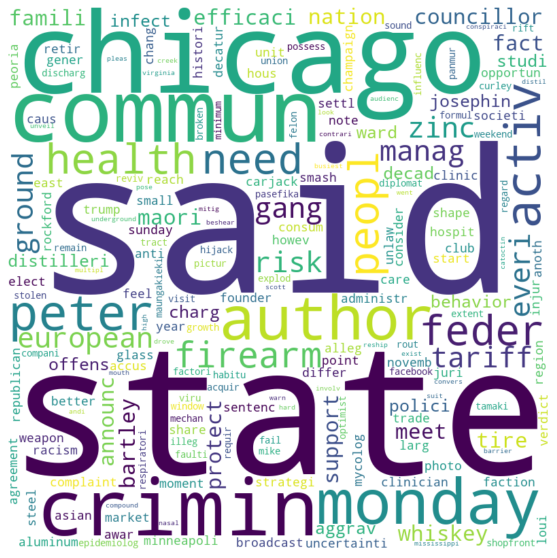

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
def word_cloud(model, tf_feature_names, index):
    
    imp_words_topic=""
    comp = model.components_[index]
    tfs = ['_'.join(t.split(' ')) for t in tf_feature_names]
    vocab_comp = zip(tfs, comp)
    sorted_words = sorted(vocab_comp, key = lambda x:x[1], reverse=True)[:200]
    
    for word in sorted_words:
        imp_words_topic = imp_words_topic + " " + word[0]
    
    return WordCloud(
        background_color="white",
        width=800, 
        height=800, 
        contour_width=2, 
        contour_color='steelblue'
    ).generate(imp_words_topic)
    
topic = 0 # could also be 1, 2,3,4 
tf_feature_names = vec_model.get_feature_names()
wordcloud = word_cloud(lda, tf_feature_names, topic)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [23]:
# Topics
topic_names = [
  [0, "G", "customer obsessed"],
  [1, "S", "valuing employees"],
  [2, "G", "code of conduct"],
  [3, "E", "energy transition"],
  [4, "S", "community support"],
]
 
topic_names_df = pd.DataFrame(topic_names, columns=['id', 'topic', 'policy'])
topic_names_df

,id,topic,policy
0,0,G,customer obsessed
1,1,S,valuing employees
2,2,G,code of conduct
3,3,E,energy transition
4,4,S,community support


In [24]:
df_news_esg_predictions = df_news.drop(columns=['content', 'lemma'], axis=1)
df_news_esg_predictions['probabilities'] = pipeline.transform(corpus).tolist()
df_news_esg_predictions

,company,url,statement,probabilities
27,janus henderson,https://www.abqjournal.com/2442567/austin-lead...,"AUSTIN, Texas--Austin leaders gathered Monday ...","[0.009821946399712865, 0.009808134528001392, 0..."
28,janus henderson,https://www.abqjournal.com/2442567/austin-lead...,The nonprofit Interfaith Action of Central Tex...,"[0.009287163254254854, 0.009271167802530062, 0..."
34,janus henderson,https://www.abqjournal.com/2442567/austin-lead...,"Also, on Oct. 23, about a dozen people unfurle...","[0.006677920089210894, 0.0066796276635989445, ..."
43,tcf financial,https://missoulian.com/news/national/american-...,"LOUISVILLE, Ky. (AP)--American whiskey produce...","[0.01044924002740455, 0.9478543336292925, 0.01..."
45,tcf financial,https://missoulian.com/news/national/american-...,Tasked with ramping up distribution networks i...,"[0.007949622424254885, 0.960265025470541, 0.00..."
...,...,...,...,...
404,lazard,https://www.stuff.co.nz/business/industries/12...,"READ MORE: * Use of te reo Maori on radio, TV ...","[0.006204867965707255, 0.0061889013323384754, ..."
406,lazard,https://www.stuff.co.nz/business/industries/12...,Getty Images The coronavirus pandemic and the ...,"[0.012014680220239481, 0.940267416159455, 0.01..."
408,lazard,https://www.stuff.co.nz/business/industries/12...,BSA Chief Executive Glen Scanlon said the incr...,"[0.009295928390306745, 0.9535282720488859, 0.0..."
411,lazard,https://www.stuff.co.nz/business/industries/12...,In March the BSA took a stance on how it dealt...,"[0.9443323546069584, 0.01113188875240871, 0.01..."


In [25]:
df = df_news_esg_predictions.copy()
df['id'] = df['probabilities'].apply(lambda x: np.argmax(x))
df['probability'] = df['probabilities'].apply(lambda x: np.max(x))
df

,company,url,statement,probabilities,id,probability
27,janus henderson,https://www.abqjournal.com/2442567/austin-lead...,"AUSTIN, Texas--Austin leaders gathered Monday ...","[0.009821946399712865, 0.009808134528001392, 0...",3,0.950866
28,janus henderson,https://www.abqjournal.com/2442567/austin-lead...,The nonprofit Interfaith Action of Central Tex...,"[0.009287163254254854, 0.009271167802530062, 0...",3,0.953630
34,janus henderson,https://www.abqjournal.com/2442567/austin-lead...,"Also, on Oct. 23, about a dozen people unfurle...","[0.006677920089210894, 0.0066796276635989445, ...",5,0.966573
43,tcf financial,https://missoulian.com/news/national/american-...,"LOUISVILLE, Ky. (AP)--American whiskey produce...","[0.01044924002740455, 0.9478543336292925, 0.01...",1,0.947854
45,tcf financial,https://missoulian.com/news/national/american-...,Tasked with ramping up distribution networks i...,"[0.007949622424254885, 0.960265025470541, 0.00...",1,0.960265
...,...,...,...,...,...,...
404,lazard,https://www.stuff.co.nz/business/industries/12...,"READ MORE: * Use of te reo Maori on radio, TV ...","[0.006204867965707255, 0.0061889013323384754, ...",4,0.969038
406,lazard,https://www.stuff.co.nz/business/industries/12...,Getty Images The coronavirus pandemic and the ...,"[0.012014680220239481, 0.940267416159455, 0.01...",1,0.940267
408,lazard,https://www.stuff.co.nz/business/industries/12...,BSA Chief Executive Glen Scanlon said the incr...,"[0.009295928390306745, 0.9535282720488859, 0.0...",1,0.953528
411,lazard,https://www.stuff.co.nz/business/industries/12...,In March the BSA took a stance on how it dealt...,"[0.9443323546069584, 0.01113188875240871, 0.01...",0,0.944332


In [26]:
df_merged = df.merge(topic_names_df, on='id').drop(['probabilities', 'id', 'url'], axis=1)
df_merged

,company,statement,probability,topic,policy
0,janus henderson,"AUSTIN, Texas--Austin leaders gathered Monday ...",0.950866,E,energy transition
1,janus henderson,The nonprofit Interfaith Action of Central Tex...,0.953630,E,energy transition
2,keybank,"He continued, ""The reason I cant lock down a d...",0.956031,E,energy transition
3,citigroup,"After Willis was dismissed from the stand, the...",0.956026,E,energy transition
4,national australia bank 1,The Michigan Department of Health and Human Se...,0.499361,E,energy transition
...,...,...,...,...,...
106,national bank greece,In an interview with Israel's TV broadcaster C...,0.950815,S,community support
107,goldman sachs,"BEMIDJI, Minn.--Foraging season is winding dow...",0.958208,S,community support
108,goldman sachs,The club also has hosted mushroom cooking even...,0.944293,S,community support
109,goldman sachs,"Fungus forays typically begin in May, she says...",0.947752,S,community support


In [27]:
# Retrieve initiatives: Using a partitioning window, we extract the most descriptive policies for each organization.
# simplify a complex PDF document of hundreds of pages into specific initiatives
# answering questions like "What did company X do with regards to environmental policy?"
df_merged.sort_values(['company','probability'], ascending=False).groupby('company').head(1)

,company,statement,probability,topic,policy
87,wells fargo,"Advertisement Advertisement Fintechs, digital ...",0.958313,S,community support
45,tcf financial,But whiskey producers sounded optimistic Monda...,0.963687,G,customer obsessed
36,t rowe price,"Now, with the help of The Laundress, I can suc...",0.965187,S,valuing employees
53,standard chartered,"""In Chicago, Peoria, East St. Louis, Champaign...",0.972129,G,customer obsessed
16,pnc,"In her ruling, Quebec Superior Court Justice G...",0.969074,E,energy transition
22,national bank greece,Israel's Foreign Minister Yari Lapid called ou...,0.963659,E,energy transition
6,national australia bank 1,The upcoming schedule for bottled water pickup...,0.981036,E,energy transition
110,lazard,"READ MORE: * Use of te reo Maori on radio, TV ...",0.969038,S,community support
37,laurentian bank of canada,LUXSTAINABILITY-WHEN LUXURY MEETS SUSTAINABILI...,0.947806,S,valuing employees
66,keybank,"Deadline writes: ""The video consisted of vario...",0.965256,G,code of conduct


In [28]:
# "How much more does company X focus on the wellbeing of their employees compare to company Y?"
esg_group = df_news_esg_predictions.copy()
esg_group['topics'] = esg_group['probabilities'].apply(lambda xs: [[i, x] for i, x in enumerate(xs)])
esg_group = esg_group.explode('topics').reset_index(drop=True)
esg_group['id'] = esg_group['topics'].apply(lambda x: x[0])
esg_group['probability'] = esg_group['topics'].apply(lambda x: x[1])
esg_group = esg_group[['company', 'id', 'probability']]
esg_group = esg_group.merge(topic_names_df, on='id')
esg_group = pd.pivot_table(
  esg_group, 
  values='probability', 
  index='company',
  columns=['policy'], 
  aggfunc=np.sum)
esg_group

policy,code of conduct,community support,customer obsessed,energy transition,valuing employees
company,,,,,
ameriprise,1.937166,0.980432,0.983054,0.033133,0.033098
bank of america,1.005474,1.942904,1.972697,0.072357,1.934177
barclays,0.015531,0.015524,0.970055,0.015525,0.967846
capital one,0.101284,1.017565,2.881920,3.863504,0.101302
citigroup,0.008855,0.008784,0.008779,0.956026,0.008785
goldman sachs,3.901833,2.956579,2.001641,0.135965,2.034876
janus henderson,0.025806,0.025773,0.025787,1.911199,0.025759
jpmorgan chase,0.016675,0.016667,0.916615,0.016684,0.016684
keybank,0.974062,0.015735,0.015730,0.962986,0.015747


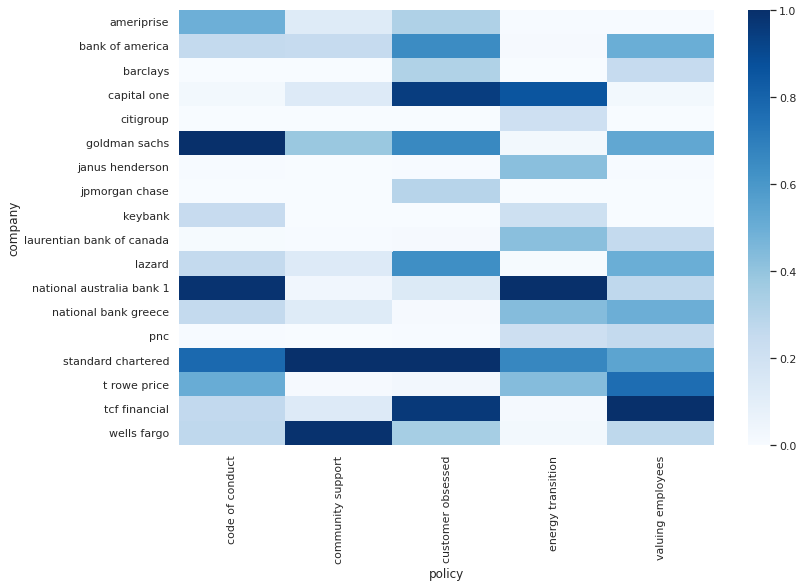

In [29]:
# scale topic frequency between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
esg_focus = pd.DataFrame(scaler.fit_transform(esg_group), columns=esg_group.columns)
esg_focus.index = esg_group.index
 
# plot heatmap, showing main area of focus for each company across topics we learned
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(esg_focus, annot=False, cmap='Blues')
plt.show()

In [30]:
# CSR score
# how much a company talks about ESG vs. how much they walk the talk.
topics = topic_names_df
topics_b = list(zip(topics.topic, topics.policy))
topics_b

[('G', 'customer obsessed'),
 ('S', 'valuing employees'),
 ('G', 'code of conduct'),
 ('E', 'energy transition'),
 ('S', 'community support')]

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 36 kB/s 
     |████████████████████████████████| 198 kB 42.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=d67214e818a2c645e2b21ee78f11fae551e83879c4d06a9ccbf04540c6a510df
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [31]:
df_merged.sort_values(['company','probability'], ascending=False).groupby(['company','topic','policy']).head(3)

,company,statement,probability,topic,policy
87,wells fargo,"Advertisement Advertisement Fintechs, digital ...",0.958313,S,community support
90,wells fargo,It also made it harder to distinguish between ...,0.953637,S,community support
88,wells fargo,"""The effect of debanking of legitimate and law...",0.953618,S,community support
48,wells fargo,"""Contrary to managing and mitigating risk, the...",0.953409,G,customer obsessed
65,wells fargo,Walk away with vital knowledge on a number of ...,0.950723,G,code of conduct
...,...,...,...,...,...
29,bank of america,"The researchers concluded that zinc is ""a viab...",0.940340,S,valuing employees
72,ameriprise,'Wicked Town members regularly promoted their ...,0.972137,G,code of conduct
51,ameriprise,Federal authorities unveil charges against Chi...,0.958232,G,customer obsessed
96,ameriprise,An indictment alleged 13 members of the 'Wicke...,0.956016,S,community support


In [32]:
csr_summary = df_merged.groupby(['company','topic','policy']).mean().reset_index()
csr_summary["count"] = df_merged.groupby(['company','topic','policy']).count().reset_index()["statement"].values
csr_summary = csr_summary.rename(columns={"probability": "esg", "company":"organisation"})
csr_summary

,organisation,topic,policy,esg,count
0,ameriprise,G,code of conduct,0.959977,2
1,ameriprise,G,customer obsessed,0.958232,1
2,ameriprise,S,community support,0.956016,1
3,bank of america,G,code of conduct,0.944215,1
4,bank of america,G,customer obsessed,0.958443,2
5,bank of america,S,community support,0.946020,2
6,bank of america,S,valuing employees,0.942359,2
7,barclays,G,customer obsessed,0.962088,1
8,barclays,S,valuing employees,0.960245,1
9,capital one,E,energy transition,0.950437,4


In [33]:
# normalization
from scipy.stats import percentileofscore

esg_scores = csr_summary.groupby(['topic', 'policy'])['esg'].agg(list)
esg_scores_norm = pd.DataFrame(esg_scores).rename({'esg': 'esg_dist'}, axis=1)
esg_norm = csr_summary.merge(esg_scores_norm, left_on=['topic', 'policy'], right_on=['topic', 'policy'])
def norm(score, dist):
  return percentileofscore(dist, score)
 
esg_norm['esg'] = esg_norm.apply(lambda x: norm(x.esg, x.esg_dist), axis=1)
esg_norm['confidence'] = pd.cut(esg_norm['count'], 3, labels=["poor", "medium", "high"])
 
esg_norm = esg_norm[['topic', 'policy', 'organisation', 'esg', 'confidence']]
esg_norm

,topic,policy,organisation,esg,confidence
0,G,code of conduct,ameriprise,63.636364,poor
1,G,code of conduct,bank of america,18.181818,poor
2,G,code of conduct,goldman sachs,36.363636,medium
3,G,code of conduct,keybank,100.000000,poor
4,G,code of conduct,lazard,81.818182,poor
5,G,code of conduct,national australia bank 1,9.090909,medium
6,G,code of conduct,national bank greece,54.545455,poor
7,G,code of conduct,standard chartered,72.727273,poor
8,G,code of conduct,t rowe price,45.454545,poor
9,G,code of conduct,tcf financial,90.909091,poor


In [ ]:
esg_norm[esg_norm.organisation=="ameriprise"]

,topic,policy,organisation,esg,confidence
0,E,energy transition,ameriprise,5.000000,poor
20,G,code of conduct,ameriprise,55.000000,poor
40,G,customer obsessed,ameriprise,20.000000,poor
60,S,community support,ameriprise,15.789474,poor
79,S,valuing employees,ameriprise,73.684211,poor


In [34]:
# represent companies ESG focus across the E, S and G using a simple bar chart.
esg_csr_data = esg_norm.groupby(["organisation","topic"])["esg"].mean().reset_index()
esg_csr_data["esg"] = esg_csr_data["esg"]/3
esg_csr_data = esg_csr_data.pivot(index='organisation', columns='topic', values='esg')
esg_csr_data

topic,E,G,S
organisation,,,
ameriprise,NaN,22.272727,29.629630
bank of america,NaN,16.363636,8.333333
barclays,NaN,33.333333,27.777778
capital one,13.333333,6.666667,3.703704
citigroup,23.333333,NaN,NaN
goldman sachs,NaN,11.060606,21.759259
janus henderson,16.666667,NaN,NaN
jpmorgan chase,NaN,3.333333,NaN
keybank,26.666667,33.333333,NaN


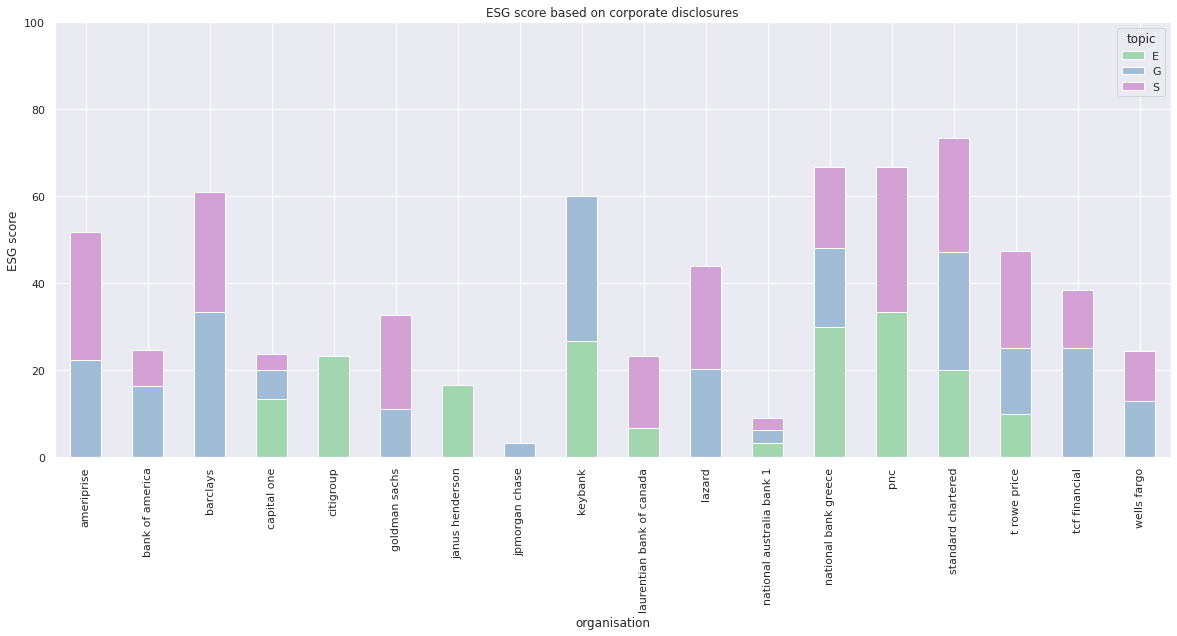

In [35]:
esg_csr_data.plot.bar(
  rot=90, 
  stacked=True, 
  color={"E": "#A1D6AF", "S": "#D3A1D6", "G": "#A1BCD6"},
  title='ESG score based on corporate disclosures',
  ylabel='ESG score',
  ylim=[0, 100],
  figsize=(20,8)
)